In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#DATA SHAPES

airlines = pd.read_csv('airlines.csv')
airports= pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv', low_memory=False)
print (airlines.shape)
print (airports.shape)
print (flights.shape)

(14, 2)
(322, 7)
(5819079, 31)


In [22]:
#ADD AIRLINE/AIRPORT NAMES TO DICTIONARY
airlines_dict = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
airport_dict = airports.set_index('IATA_CODE')['AIRPORT'].to_dict()
flights['AIRLINE_NAME'] = flights['AIRLINE'].apply(lambda x: airlines_dict[x])
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,AIRPORT_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.,San Francisco International Airport
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport


In [7]:
#FLIGHTS OPERATION

cancelled = flights[flights['CANCELLED'] == 1].count()['CANCELLED']
scheduled = flights.count()['SCHEDULED_DEPARTURE']
operated = scheduled - cancelled

print("Scheduled flights: ", scheduled)
print("Cancelled flights: ", cancelled)
print("Operated flights: ", operated)

Scheduled flights:  5819079
Cancelled flights:  89884
Operated flights:  5729195


In [12]:
#TOTAL FLIGHTS IN 2015 BY AIRLINE

flightvolume = pd.DataFrame({'TOTAL_FLIGHTS' : flights.groupby(['AIRLINE_NAME'])['SCHEDULED_DEPARTURE'].count()})
flightvolume.sort_values('TOTAL_FLIGHTS', ascending=False, inplace=True)
flightvolume

,TOTAL_FLIGHTS
AIRLINE_NAME,
Southwest Airlines Co.,1261855
Delta Air Lines Inc.,875881
American Airlines Inc.,725984
Skywest Airlines Inc.,588353
Atlantic Southeast Airlines,571977
United Air Lines Inc.,515723
American Eagle Airlines Inc.,294632
JetBlue Airways,267048
US Airways Inc.,198715


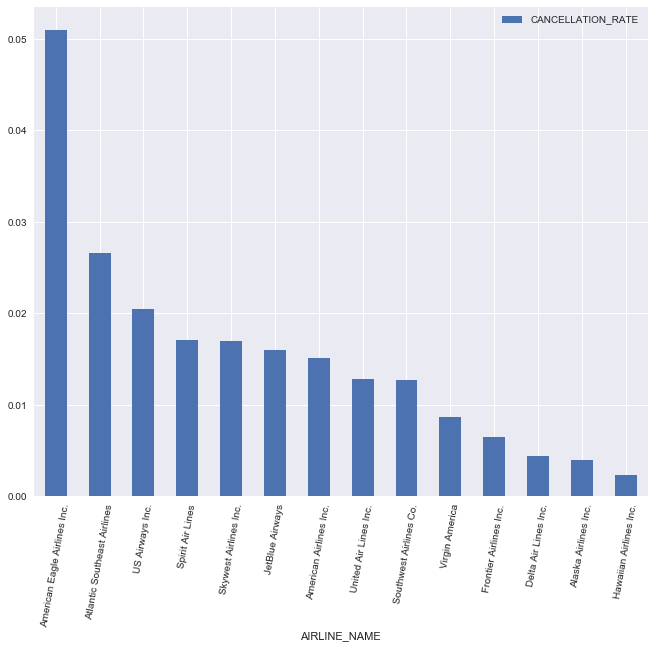

In [14]:
#AVERAGE AIRLINE CANCELLATION RATE FROM HIGHEST TO LOWEST

df_cancel = pd.DataFrame({'CANCELLATION_RATE' : flights.groupby(['AIRLINE_NAME'])['CANCELLED'].mean()})
df_cancel.sort_values('CANCELLATION_RATE', ascending=False, inplace=True)
df_cancel.plot.bar(legend=True,figsize = (11,9), rot=80)

In [15]:
#AVERAGE ARRIVAL/DEPARTURE DELAY IN MINUTES BY AIRLINE

df_delay = pd.DataFrame(flights.groupby('AIRLINE_NAME')[['DEPARTURE_DELAY','ARRIVAL_DELAY']].mean())
df_delay.sort_values('ARRIVAL_DELAY', ascending=False, inplace=True)
df_delay

,DEPARTURE_DELAY,ARRIVAL_DELAY
AIRLINE_NAME,,
Spirit Air Lines,15.944766,14.471800
Frontier Airlines Inc.,13.350858,12.504706
JetBlue Airways,11.514353,6.677861
Atlantic Southeast Airlines,8.715934,6.585379
American Eagle Airlines Inc.,10.125188,6.457873
Skywest Airlines Inc.,7.801104,5.845652
United Air Lines Inc.,14.435441,5.431594
Virgin America,9.022595,4.737706
Southwest Airlines Co.,10.581986,4.374964


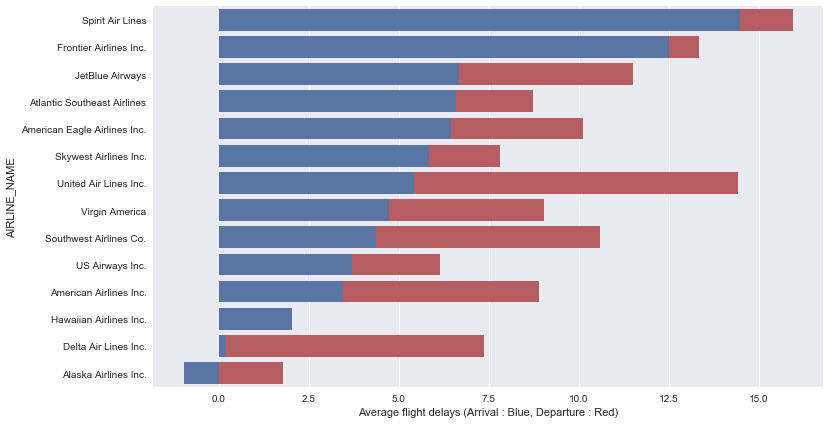

In [16]:
#AVERAGE ARRIVAL/DEPATURE DELAY BY AIRLINE GRAPH

df_delay.sort_values(['ARRIVAL_DELAY','DEPARTURE_DELAY'],ascending=False,inplace=True)
plt.figure(figsize=(12,7))
sns.set_color_codes("deep")
sns.set_context(font_scale=2.5)
plot = sns.barplot(x='DEPARTURE_DELAY',y=df_delay.index,data = df_delay,color = 'r')
plot = sns.barplot(x='ARRIVAL_DELAY',y=df_delay.index,data = df_delay,color = 'b')
plot.set(xlabel='Average flight delays (Arrival : Blue, Departure : Red)')

In [17]:
#DELAY REASONS

# delays_weather = flights.loc[(flights['WEATHER_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
# delays_lateaircraft = flights.loc[(flights['LATE_AIRCRAFT_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
# delays_airline = flights.loc[(flights['AIRLINE_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
# delays_security = flights.loc[(flights['SECURITY_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
# delays_airsystem = flights.loc[(flights['AIR_SYSTEM_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()

# labels = 'Weather', 'Late Arrival', 'Airline/Carrier', 'Security', 'Air System'
# sizes = [delays_weather, delays_lateaircraft, delays_airline, delays_security, delays_airsystem]
# explode = (0.1, 0.1, 0.1, 0.1, 0.1)
# colors=['blue','red','green','black','orange']

# fig1, ax1 = plt.subplots(figsize=(6,6))
# ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.2f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')

# plt.show()

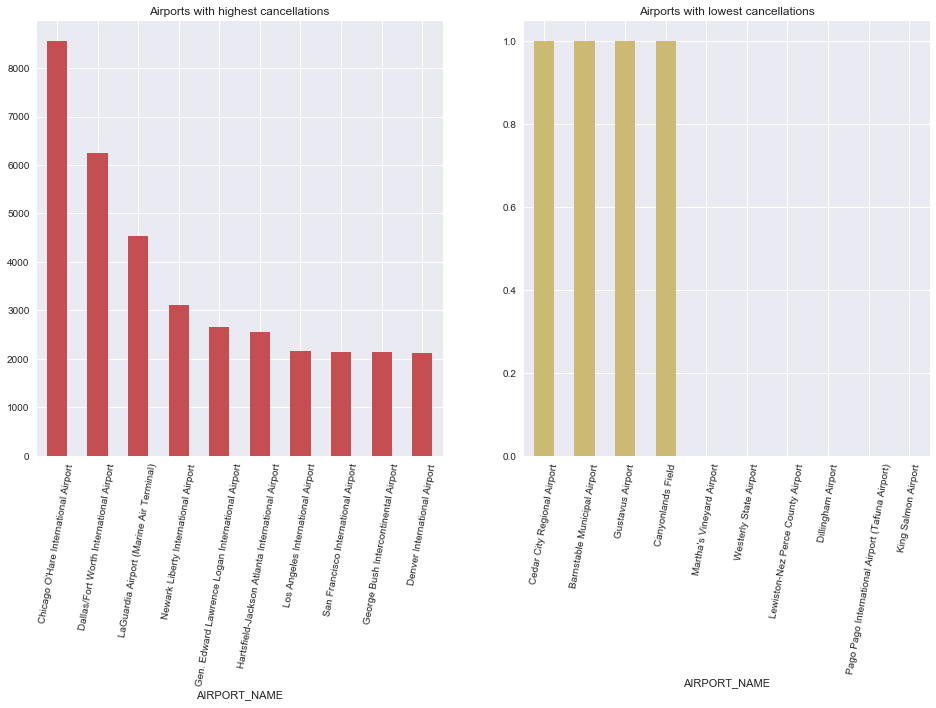

In [18]:
#AIRPORTS WITH THE HIGHEST/LOWEST CANCELLED FLIGHTS

flights = flights[flights.ORIGIN_AIRPORT.str.len() == 3]
flights['AIRPORT_NAME'] = flights['ORIGIN_AIRPORT'].apply(lambda x:airport_dict[x])

airport_df = pd.DataFrame(flights.groupby('AIRPORT_NAME')['SCHEDULED_DEPARTURE'].count())
airport_df['CANCELLED_FLIGHTS']=flights.groupby('AIRPORT_NAME')['CANCELLED'].sum()
airport_df.drop(airport_df.columns[[0]],axis=1,inplace=True)
airport_df.sort_values('CANCELLED_FLIGHTS', ascending=0, inplace=True)

fig, axs = plt.subplots(1,2)

airport_df.iloc[:10].plot.bar(ax=axs[0],legend=None,figsize=(16,8),rot=80, color='r',title="Airports with highest cancellations")
airport_df.iloc[-10:].plot.bar( ax=axs[1],legend=None,figsize=(16,8),rot=80,color='y', title="Airports with lowest cancellations")


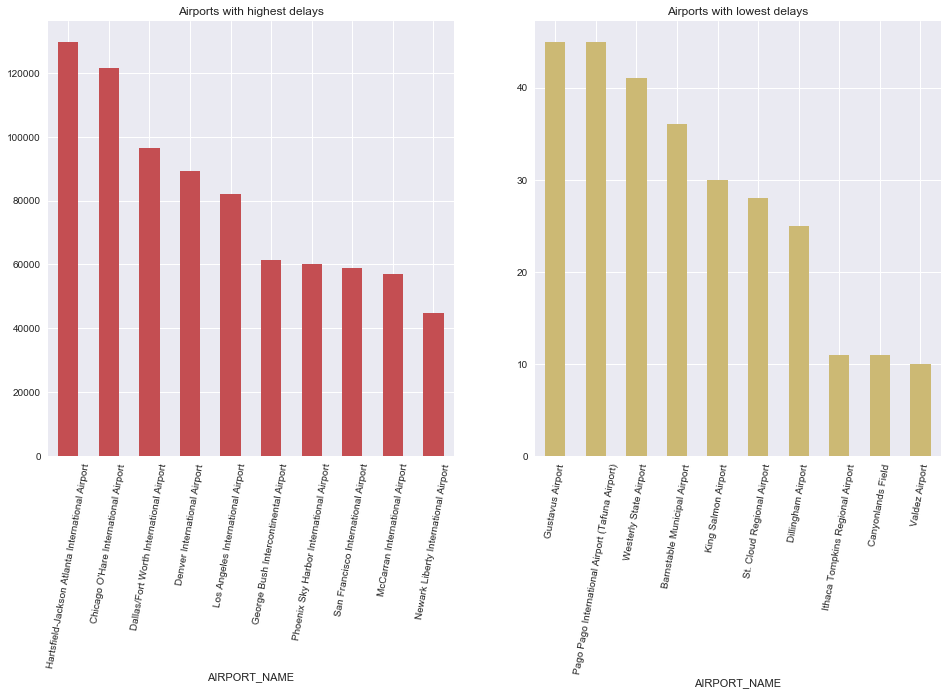

In [19]:
#AIRPORTS WITH THE HIGHEST/LOWEST DELAYED FLIGHTS

flights['DEPARTURE_DELAY'] = flights['DEPARTURE_DELAY'].apply(lambda x: 1 if(x>0) else 0)
airport_df['DELAYED_FLIGHTS'] = flights.groupby('AIRPORT_NAME')['DEPARTURE_DELAY'].sum()
airport_df.sort_values('DELAYED_FLIGHTS', ascending=False, inplace=True)
airport_df.drop(airport_df.columns[[0]],axis=1,inplace=True)

fig, axs = plt.subplots(1,2)

airport_df.iloc[:10].plot.bar(ax=axs[0],legend=None,figsize=(16,8),rot=80,color='r',title="Airports with highest delays")
airport_df.iloc[-10:].plot.bar(ax=axs[1],legend=None,figsize=(16,8),rot=80,color='y',title="Airports with lowest delays")